In [5]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import random
import math

# random 모듈 시드 설정
random.seed(42)

# 모델 생성
model = gp.Model("pesticide_application")

# 파일 읽기
file_path = 'weed_coordinates.txt'
data = pd.read_csv(file_path, sep=',')

# 'row'와 'col' 열을 이용하여 튜플 리스트 생성
required_pixels = [(row, col) for row, col in zip(data['row'], data['col'])]

# 데이터/파라미터 초기화
N = 511  # 그리드의 가로 크기
M = 612  # 그리드의 세로 크기
max_distance = 11

# I 정의
I = [y * N + x for (x, y) in required_pixels] 

# J의 새로운 정의를 위한 필터링
potential_J = set()
for i in I:
    xi, yi = divmod(i, N)
    for i_prime in I:
        if i != i_prime:
            xi_prime, yi_prime = divmod(i_prime, N)
            if math.sqrt((xi - xi_prime) ** 2 + (yi - yi_prime) ** 2) <= max_distance:
                potential_J.update(range(max(0, i_prime - max_distance), min(N * M, i_prime + max_distance + 1)))

# J를 potential_J로 업데이트
J = list(potential_J)

# 변수 생성
S = model.addVars(J, vtype=GRB.BINARY, name="S")  # 살포 지점 j가 선택되었는지를 나타내는 이진 변수
C = model.addVars([(i, j) for i in I for j in J if math.sqrt((divmod(j, N)[0]-divmod(i, N)[0])**2 + (divmod(j, N)[1]-divmod(i, N)[1])**2) <= max_distance], vtype=GRB.BINARY, name="C")
a = model.addVars(J, vtype=GRB.CONTINUOUS, name="a")

# 목적 함수 설정
model.setObjective(gp.quicksum(S[j] for j in J), sense=GRB.MINIMIZE)

# 제약 조건 추가
for i in I:
    xi, yi = divmod(i, N)
    for j in J:
        if math.sqrt((xi - divmod(j, N)[0]) ** 2 + (yi - divmod(j, N)[1]) ** 2) <= max_distance:
            # 제약 조건
            model.addConstr(C[i, j] <= a[j])
            model.addConstr(S[j] >= C[i, j])

# 모든 i가 적어도 하나의 j에 의해 커버되어야 한다는 제약 조건
for i in I:
    model.addConstr(gp.quicksum(C[i, j] for j in J if math.sqrt((xi - divmod(j, N)[0]) ** 2 + (yi - divmod(j, N)[1]) ** 2) <= max_distance) >= 1)

# 모델 최적화
model.optimize()

KeyboardInterrupt: 

In [6]:
I

[226889,
 227400,
 227911,
 228422,
 228933,
 229444,
 229955,
 230466,
 230977,
 231488,
 226890,
 227401,
 227912,
 228423,
 228934,
 229445,
 229956,
 230467,
 230978,
 231489,
 3073,
 3584,
 4095,
 4606,
 5117,
 5628,
 6139,
 6650,
 7161,
 7672,
 8183,
 8694,
 9205,
 9716,
 10227,
 10738,
 11249,
 11760,
 12271,
 226891,
 227402,
 227913,
 228424,
 228935,
 229446,
 229957,
 230468,
 230979,
 231490,
 3074,
 3585,
 4096,
 4607,
 5629,
 6140,
 6651,
 7162,
 7673,
 8184,
 8695,
 9206,
 9717,
 10228,
 10739,
 11250,
 11761,
 12272,
 226892,
 227403,
 227914,
 228425,
 228936,
 229447,
 229958,
 230469,
 230980,
 231491,
 3075,
 3586,
 4608,
 5119,
 7674,
 8185,
 8696,
 9207,
 9718,
 10229,
 10740,
 11251,
 11762,
 12273,
 226893,
 227404,
 227915,
 228426,
 229448,
 229959,
 230470,
 230981,
 231492,
 232003,
 3076,
 3587,
 4609,
 5120,
 7675,
 8186,
 8697,
 9208,
 9719,
 10230,
 10741,
 11252,
 11763,
 12274,
 226894,
 227405,
 227916,
 228427,
 229449,
 230982,
 231493,
 232004,
 30

In [ ]:
# random 모듈 시드 설정
random.seed(42)

# 모델 생성
model = gp.Model("pesticide_application")

# 파일 읽기
file_path = 'weed_coordinates.txt'
data = pd.read_csv(file_path, sep=',')

# 'row'와 'col' 열을 이용하여 튜플 리스트 생성
required_pixels = [(row, col) for row, col in zip(data['row'], data['col'])]

# 데이터/파라미터 초기화
N = 511  # 그리드의 가로 크기
M = 612  # 그리드의 세로 크기
J = range(N * M)  # 전체 그리드 픽셀 집합
I = [y * N + x for (x, y) in required_pixels]



In [ ]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import random
import matplotlib.pyplot as plt
import math

# random 모듈 시드 설정
random.seed(42)

# 모델 생성
model = gp.Model("pesticide_application")

# 파일 읽기
file_path = 'weed_coordinates.txt'
data = pd.read_csv(file_path, sep=',')

# 'row'와 'col' 열을 이용하여 튜플 리스트 생성
required_pixels = [(row, col) for row, col in zip(data['row'], data['col'])]

# 데이터/파라미터 초기화
N = 511  # 그리드의 가로 크기
M = 612  # 그리드의 세로 크기
J = range(N * M)  # 전체 그리드 픽셀 집합
I = [y * N + x for (x, y) in required_pixels]

def calc_range():
    r = [57.73502691896256,
    63.508529610858815,
    69.28203230275507,
    75.05553499465132,
    80.8290376865476,
    86.60254037844385,
    92.3760430703401,
    98.14954576223636,
    103.92304845413261,
    109.69655114602887,
    115.47005383792512]

    return r[0]/10, r[-1]/10

r1, r2 = calc_range()

max_distance = 115.47005383792512/10  # 이 값은 적절하게 조정 가능

# 제약 조건을 추가하기 전에, 각 i 픽셀에 대해 허용 가능한 j 픽셀만 필터링
nearby_j = {i: [j for j in J if math.sqrt(((divmod(j, N)[0]-divmod(i, N)[0])**2 + 
                                           (divmod(j, N)[1]-divmod(i, N)[1])**2)) <= max_distance] for i in I}

# 변수 생성
S = model.addVars(J, vtype=GRB.BINARY, name="S")  # 살포 지점 j가 선택되었는지를 나타내는 이진 변수
C = model.addVars([(i, j) for i in I for j in nearby_j[i]], vtype=GRB.BINARY, name="C")  # 지점 j에 의해서 지점 i가 커버될 수 있는지를 나타내는 이진 변수
a = model.addVars(J, vtype=GRB.CONTINUOUS, name="a")

# 목적 함수 설정: 최소한의 살포 지점 선택
model.setObjective(gp.quicksum(S[j] for j in J), sense=GRB.MINIMIZE)

# 제약 조건 추가
for i in I:
    xi, yi = divmod(i, N)  # i 픽셀의 (x, y) 좌표
    for j in nearby_j[i]:
        xj, yj = divmod(j, N)  # j 픽셀의 (x, y) 좌표
        # zj = z_values[j]  # j 픽셀의 z 좌표
        dist = math.sqrt(((xj-xi)**2 + (yj-yi)**2)) # 두 좌표간의 거리

        # i 픽셀이 j 픽셀에 의해 커버될 수 있는지에 대한 제약 조건
        model.addConstr(dist * C[i,j]<=a[j]
        model.addConstr(r1 <= a[j])
        model.addConstr(a[j]<= r2)
        model.addConstr(S[j] >= C[i, j])

# 모든 i가 적어도 하나의 j에 의해 커버되어야 한다는 제약 조건
for i in I:
    model.addConstr(gp.quicksum(C[i, j] for j in nearby_j[i]) >= 1)

# 모델 최적화
model.optimize()


In [19]:
# 최적해 출력 및 시각화 준비
if model.status == GRB.OPTIMAL:
    solution = {v.varName: v.x for v in model.getVars() if v.x != 0}


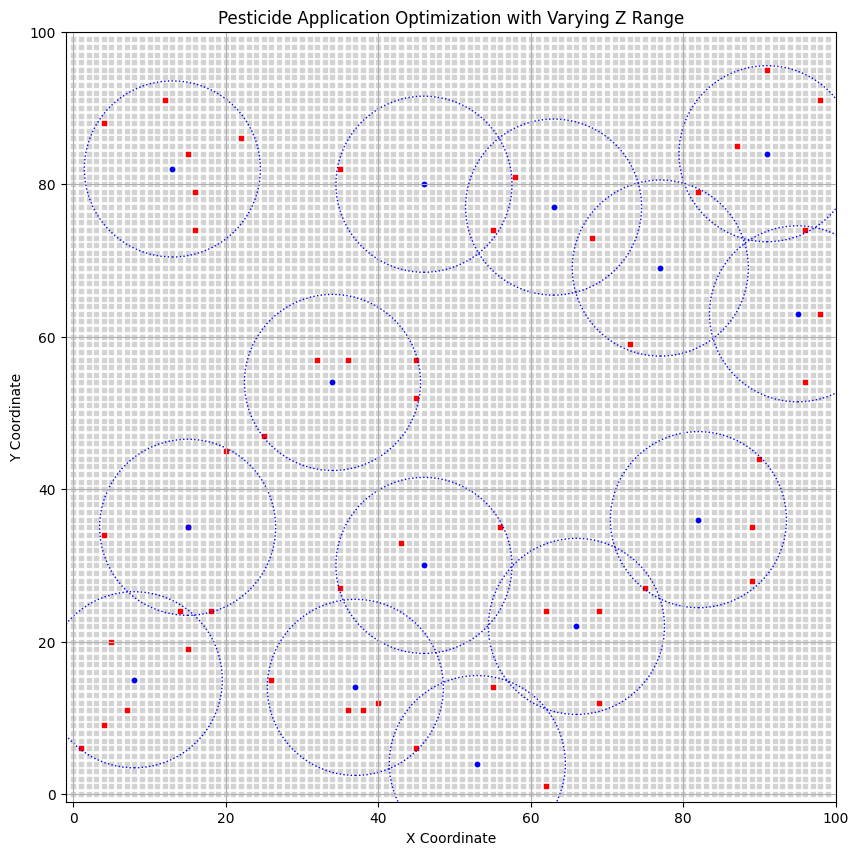

In [21]:
# 최적해 출력 및 시각화 준비
if model.status == GRB.OPTIMAL:
    # solution = {v.varName: v.x for v in model.getVars() if v.x != 0}

    # 시각화 코드
    fig, ax = plt.subplots(figsize=(12, 10))

    # 전체 그리드 픽셀
    for j in J:
        xj, yj = divmod(j, N)
        ax.scatter(xj, yj, color='lightgrey', marker='s', s=10)

    # 농약 살포가 필요한 픽셀
    for i in I:
        xi, yi = divmod(i, N)
        ax.scatter(xi, yi, color='red', marker='s', s=10)

    # 선택된 살포 지점 및 커버 범위
    for j in J:
        if S[j].x > 0.5:
            xj, yj = divmod(j, N)
            aj = a[j].x
            rect = plt.Circle((xj, yj), radius=aj, color='blue', fill=False, linestyle='dotted')
            ax.add_artist(rect)
            ax.scatter(xj, yj, color='blue', marker='o', s=10)

    plt.xlim(-1, N)
    plt.ylim(-1, M)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.title('Pesticide Application Optimization with Varying Z Range')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
else:
    print("No optimal solution found.")